<a href="https://colab.research.google.com/github/mbayle98/DMML2020-Alpina/blob/main/Copie_de_Alpina_%7C_DM%26ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final project DM&ML

## 1. Load data train

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/mbayle98/DMML2020-Alpina/main/Data/training_data.csv")
df_basic_model = df1.copy()
df1

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1
...,...,...,...,...,...
6466,4377,earthquake,ARGENTINA,#Earthquake #Sismo M 1.9 - 15km E of Anchorage...,1
6467,3408,derail,NaN,@EmiiliexIrwin Totally agree.She is 23 and kno...,0
6468,9794,trapped,NaN,Hollywood Movie About Trapped Miners Released ...,1
6469,10344,weapons,Beirut/Toronto,Friendly reminder that the only country to eve...,1


- Dataset caracteristics: there are 6471 rows and 5 columns
- Target column:
    - 0: Fake news
    - 1: Real news







## 1.1 Load data test

In [ ]:
df_test = pd.read_csv("https://raw.githubusercontent.com/mbayle98/DMML2020-Alpina/main/Data/%20test_data.csv")
df_basic_model_test = df_test.copy()
df_test
TEST_X = df_test['text']

## 2. Base rate

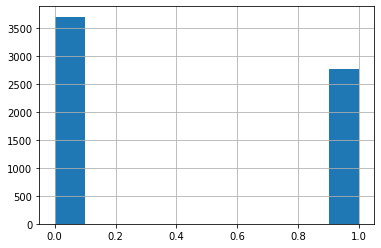

In [ ]:
Hist1 = df1.target.hist()

In [ ]:
Class_number = df1.target.value_counts()
Class_number

0    3701
1    2770
Name: target, dtype: int64

In [ ]:
Base_rate = len(df1[df1["target"] == 0])/len(df1)


In [ ]:
print("The base rate is: ", round(Base_rate,2))

The base rate is:  0.57


## 3. Cleaning

In [ ]:
import re

1. remove duplicates

In [ ]:
df1 = df1.drop_duplicates(subset=['text'], keep='first') #drop duplicate tweet in the dataset
# 6387 rows

2. Remove usernamen , number, characters that are not letters nor numbers with a with space

In [ ]:
def bin_username(tweet):
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|([0-9]+)"," ", tweet).split())
    #tweet = ' '.join(re.sub("(#[A-Za-z0-9]+)"," ", tweet).split())
    return tweet

df1['text'] = df1['text'].apply(lambda x: bin_username(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye A space battle occurred at Star O in...,0
1,853,bioterror,NaN,world FedEx no longer to transport bioterror g...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training Train falls off elevated trac...,1
3,5988,hazardous,USA,Taiwan Grace expect that large rocks trees mud...,1
4,6328,hostage,Australia,New ISIS Video ISIS Threatens to Behead Croati...,1
...,...,...,...,...,...
6466,4377,earthquake,ARGENTINA,Earthquake Sismo M km E of Anchorage Alaska Ti...,1
6467,3408,derail,NaN,Totally agree She is and know what birth contr...,0
6468,9794,trapped,NaN,Hollywood Movie About Trapped Miners Released ...,1
6469,10344,weapons,Beirut/Toronto,Friendly reminder that the only country to eve...,1


3. Remove text that starts with http/https

In [ ]:
def bin(tweet):
    tweet = ' '.join(re.sub("http://[A-Za-z0-9]"," ", tweet).split())
    tweet = ' '.join(re.sub("HTTP://[A-Za-z0-9]"," ", tweet).split())
    tweet = ' '.join(re.sub("HTTPS://[A-Za-z0-9]"," ", tweet).split())
    tweet = ' '.join(re.sub("https://[A-Za-z0-9]"," ", tweet).split())
    return tweet

In [ ]:
df1['text'] = df1['text'].apply(lambda x: bin(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye A space battle occurred at Star O in...,0
1,853,bioterror,NaN,world FedEx no longer to transport bioterror g...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training Train falls off elevated trac...,1
3,5988,hazardous,USA,Taiwan Grace expect that large rocks trees mud...,1
4,6328,hostage,Australia,New ISIS Video ISIS Threatens to Behead Croati...,1
...,...,...,...,...,...
6466,4377,earthquake,ARGENTINA,Earthquake Sismo M km E of Anchorage Alaska Ti...,1
6467,3408,derail,NaN,Totally agree She is and know what birth contr...,0
6468,9794,trapped,NaN,Hollywood Movie About Trapped Miners Released ...,1
6469,10344,weapons,Beirut/Toronto,Friendly reminder that the only country to eve...,1


## 4. Predicting

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import spacy
import re
import string
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")
np.random.seed = 72
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import spacy
sp = spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS as stpw
import string
import re
pct = string.punctuation
from sklearn.metrics import accuracy_score

In [ ]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


1. Tokenizer

In [ ]:
RT = {'rt','RT','Rt','rT'}

In [ ]:
pct = string.punctuation
sp = spacy.load('en_core_web_sm')

def token(tweet):

    #tweet = re.sub("([^\x00-\x7F])+"," ",tweet) non ASCII

    tweet = re.sub(r"\s\s+", " ", tweet) #remove regex whitespace char
    
    tk = sp(tweet)

    tk = [ char.lemma_.lower().strip() if char.lemma_ != "-PRON-" else char.lower_ for char in tk ]
        
    tk = [ char for char in tk if char not in stpw and char not in pct ]
    
    tk = [ char for char in tk if char not in RT ] #remove word rt/RT/Rt/rT

    #tk = [ char for char in tk if char not in hashtag ]


    return tk

BASIC MODEL WITH NO PREPROCESSING:

- Logistic regression

In [ ]:
X_basic = df_basic_model['text']
y_basic = df_basic_model['target']

In [ ]:
X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(X_basic, y_basic, test_size=0.2, random_state=72)

In [ ]:
vectorizer_tfidf_basic = TfidfVectorizer(tokenizer= token)

In [ ]:
classifier_basic = LogisticRegression(solver='lbfgs', max_iter=1000, random_state= 72)

In [ ]:
pipe_basic = Pipeline([('vectorizer', vectorizer_tfidf_basic),('classifier', classifier_basic)])

In [ ]:
pipe_basic.fit(X_train_basic, y_train_basic)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\w\\w+\\b',
                                 tokenizer=<function token at 0x7f63358c0d08>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_

In [ ]:
y_pred_basic = pipe_basic.predict(X_test_basic)

In [ ]:
Accuracy_test_basic = pipe_basic.score(X_test_basic, y_test_basic)

In [ ]:
Accuracy_test_basic

0.8054054054054054

__________-_________-______________-______________________-_______________DOWNLOAD BASIC MODEL 1

In [ ]:
prediction_TEST = pipe_basic.predict(TEST_X)
prediction_TEST

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
Y_test1 = pd.DataFrame()
Y_test1['prediction'] = prediction_TEST

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
Y_test1.to_csv('Y_test1.csv')

!cp Y_test1.csv "drive/My Drive/Prediction"

__________-_________-______________-______________________-_______________DOWNLOAD END

- Logistic regression with cross validation

In [ ]:
classifier_basic_cv = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=3000, random_state=72)

In [ ]:
pipe_basic_cv = Pipeline([('vectorizer', vectorizer_tfidf_basic),('classifier', classifier_basic_cv)])

In [ ]:
pipe_basic_cv.fit(X_train_basic, y_train_basic)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                 tokenizer=<function token at 0x7f5904705e18>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=5,
                                      dual=False, fit_in

In [ ]:
Accuracy_test_basic_cv = pipe_basic_cv.score(X_test_basic, y_test_basic)

In [ ]:
Accuracy_test_basic_cv

0.8007722007722008

MODEL WITH BASIC PREPROCESSING

In [ ]:
X_1 = df1['text']
y_1 = df1['target']

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=72)

In [ ]:
vectorizer_tfidf_1 = TfidfVectorizer(tokenizer= token)

In [ ]:
classifier_1 = LogisticRegression(solver='lbfgs', max_iter=1000, random_state= 72)

In [ ]:
pipe_1 = Pipeline([('vectorizer', vectorizer_tfidf_1),('classifier', classifier_1)])

In [ ]:
pipe_1.fit(X_train_1, y_train_1)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...\\w\\w+\\b',
                                 tokenizer=<function token at 0x7f5904705e18>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_

In [ ]:
Accuracy_test_1 = pipe_1.score(X_test_basic, y_test_basic)

In [ ]:
Accuracy_test_1

0.8386100386100386

- Add cv

In [ ]:
classifier_1_cv = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=3000, random_state=72)

In [ ]:
pipe_1_cv = Pipeline([('vectorizer', vectorizer_tfidf_1),('classifier', classifier_1_cv)])

In [ ]:
pipe_1_cv.fit(X_train_1, y_train_1)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                 tokenizer=<function token at 0x7f5904705e18>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=5,
                                      dual=False, fit_in

In [ ]:
Accuracy_test_1_cv = pipe_1_cv.score(X_test_basic, y_test_basic)

In [ ]:
Accuracy_test_1_cv

0.871042471042471

- No split

In [ ]:
pipe_1_cv_nosplit = Pipeline([('vectorizer', vectorizer_tfidf_1),('classifier', classifier_1_cv)])

In [ ]:
pipe_1_cv_nosplit.fit(X_1, y_1)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                 tokenizer=<function token at 0x7f5904705e18>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=5,
                                      dual=False, fit_in

In [ ]:
Accuracy_1_cv_nosplit = pipe_1_cv_nosplit.score(X_1, y_1)

In [ ]:
Accuracy_test_1_cv_nosplit

0.9353374041020823

- Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
vectorizer_tfidf_1 = TfidfVectorizer(tokenizer= token)

In [ ]:
classifier_rdmF = RandomForestClassifier()

In [ ]:
pipe_rdmF = Pipeline([('vectorizer', vectorizer_tfidf_1), ('classifier', classifier_rdmF)])


In [ ]:
pipe_rdmF.fit(X_train_1, y_train_1)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [ ]:
Accuracy_1_rdmF = pipe_rdmF.score(X_test_1, y_test_1)

In [ ]:
Accuracy_1_rdmF

0.7895148669796557